# Image Recognition
In this notebook, you will create a densely neural network to classify images in MNIST dataset.

In [1]:
# Import TensorFlow and Keras to create the neural network
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np

# Matplotlib to plot info to show the results
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing the Data

Keras has code that will load a basic version of your data into lists in Python, but they still need to be formatted to allow the neural network to use them. Reshaping and processing data into a format the neural network can consume is critical in any machine learning problem.

In this lesson, you'll learn how to prepare the MNIST dataset so that it can be put into a neural network. There are some things you should know about the MNIST dataset.

## Minimum and Maximum Values
To get started, you'll create a function that analyzes the data in an array format. The function will fetch an image at the array's current index, i, from the dataset, calculate the minimum and maximum pixel values, and display them. This information will be used to preprocess the data or images and their pixels.

In [2]:
# Load the MNIST Data
def show_min_max(array, i):
    random_image = array[i]
    print("min and max value in image: ", random_image.min(), random_image.max())

## Image & Digit Label
Now, you'll create a function that takes an image at the array's current index i, plots the image, and displays the corresponding digit label. This function visualizes the data so the model can better evaluate and draw conclusions.

In [3]:
# Create a function that will plot a image from the dataset and display the digit label.
def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Image Size & Classes
Next, you'll define the size for all images and the number of classes representing each label, 0-9.

In [4]:
# Create variables for the image row and column to keep track of your image size.
img_rows, img_cols = 28, 28

# Create a variable called num_classes and set the value to 10 output classes.
num_classes = 10

## Load the Data
Now that you've set up the helper functions and the variables, you'll load the data to train the model and test its accuracy. In addition, you'll also print the shape of the training and test image datasets.

In [5]:
# Load the data to train and test the model, as well as the labels to test the data against.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Load a backup copy of the untouched data, while the first copy will be processing the data and manipulating it.
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()

# Print the shape of the training image dataset.
print(train_images.shape)

# Print the shape of the test image dataset.
print(test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


# Sorting through the Data

Data can be formatted in many different ways. However, since the MNIST data is already so well prepared for machine learning applications, there's only a little reshaping or preparation that needs to go into it.

However, in other situations, you might come across data that needs more hefty reshaping and re-organizing. This is an important skill to develop, and as you expand your machine-learning abilities, you'll learn more about how to deal with different types of data.

## Data Formatting
For now, you will reshape the data to be an appropriate size for your network.

In [6]:
# Reshape the training data by converting the list of pixels into a 28x28 grid.
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)

# Reshape the test data by converting the list of pixels into a 28x28 grid.
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

# Create an input_shape variable to keep track of the data's shape.
input_shape = (img_rows, img_cols, 1)

## Data Cleaning
Now that the data is in the correct format, you'll do some simple data cleaning. The color in pixels is stored as an integer value between 0 and 255. While your network can learn from this information, replacing these values with a decimal between 0 and 1 will be easier. This keeps the numbers the network is dealing with small.

This will be done by changing the data to a **float32**, a 32-bit decimal number, and then dividing it to get the 0-1 values you want.

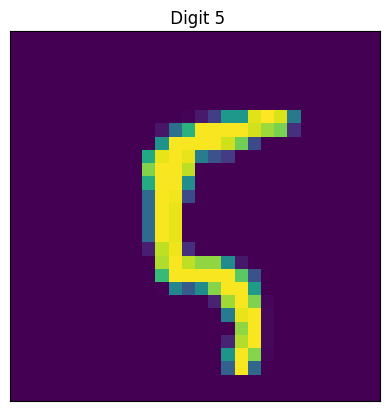

min and max value in image:  0 255


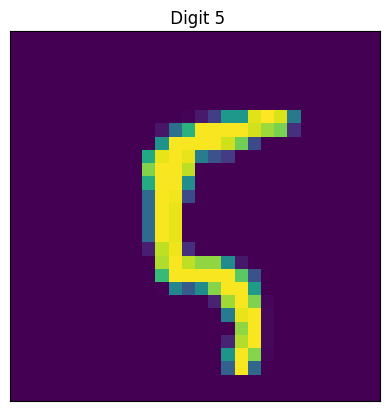

min and max value in image:  0.0 1.0


In [7]:
# Call the plot_image function to print out the 100th image in train_images.
plot_image(train_images, 100, train_labels)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

# Change the image values to between 0 and 1, convert that training data into float32.
train_images = train_images.astype('float32')

# Change the image values to between 0 and 1, convert that test data into float32.
test_images = test_images.astype('float32')

# Divide the images by 255 to make sure that each pixel is stored as a value between 0 and 1.
train_images /= 255
test_images /= 255

# Call the plot_image function to print out the 100th image in train_images.
plot_image(train_images, 100, train_labels)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

## One-Hot Encoding
MNIST is a set of hand-drawn images of the numbers 0-9. The label for each image is then simply the number 0-9.

However, this isn't the best solution. Due to how neural networks function, they intuitively believe that the image labeled "1" is more similar to the image labeled "0" or "2" than the image labeled "7". If you write 0, 1, 2, and 7 on a sheet of paper, 1 and 7 are more similar in structure, with a long straight line, than the curves in 0 or 2.

**One-Hot Encoding** is a technique that helps solve this problem by replacing the label on each image with a representation that the network won't think is ordered so that it will view each number independently.

In [9]:
# Employ one-hot encoding on your training labels.
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)

# Employ one-hot encoding on your test labels.
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# Building the Network
Neural networks learn to accomplish their tasks by reading training data and adjusting their neuron weights to improve their chance of choosing the correct answer.

The first network you'll create is a **densely connected network**.

A **densely connected network** has layers of connected neurons, where the output of one layer becomes the input for the next one.

These layers manipulate and reshape the data so that the computer can guess what the output should be.

## Import Model and Layers
You'll use a framework called TensorFlow to build, compile, and run your first neural network that can detect handwritten digits. To get started, you'll import the Sequential model and Dense and Flatten layers to perform calculations on the data.

In [ ]:
# Import the Sequential model.


# Import the Dense and Flatten layers.


## Epochs and Model Layers
Next, you'll setup the epochs, create a new model, and add the input, hidden, and output layers. Finally, you'll print the summary of your network so far.


In [ ]:
# Create a variable called epochs and set the value as 10.


# Create a new model object using the Keras Sequential.


# Add a Flatten layer and pass the input shape as an argument.


# Add a Dense layer to your network with the size of the layers in neurons and relu as the activation function.


# Add an output layer.


# Print a summary of your network so far.


# Training the Network
Now, it's time to compile the network! TensorFlow has a command that will do a lot of the work for you, but you still need to set up a few arguments so that this network is compiled effectively.

You'll add this line to compile your network, and then read below to learn more about each argument.

## Compile the Network
By compiling the network, your model output will decide what class an image belongs to. The optimizer will be a general-purpose algorithm called Adam. The Adam algorithm will help the neural network adjust the weights to learn based on the incorrect calculations it makes.

The loss algorithm is categorical cross-entropy. The cross-entrophy algorithm matches the network's predictions to the actual results to test for accuracy. Since this problem involves sorting data into categories, the metric to watch is accuracy.

In [ ]:
# Add the compile function that calculates the loss and uses the optimizer parameter to set the optimization algorithm.


## Training
Now that you have a compiled model, you can fit that model to the actual data that you prepared. The fit stage will use the training data to train the model to recognize numbers.

The **train_images** data set will be the input. The **train_labels** will track whether the network guess is correct, and the **epochs** will equal the variable you set up earlier.

In [ ]:
# Add the fit function and set the input data for the model so the network doesn't rely on a pattern to learn.


## Analyzing the Output
Knowing how well the model did on the training data could be more helpful. It means little if you get an A on a test where you're given the answers.

The real test of a model is how well it does on data it has yet to see before and doesn't know the labels for. That's exactly what the **model.evaluate()** function is for.

This function takes the trained model and the test data and produces a set of scores, or metrics, that show how well the model did on this test data.

While **model.evaluate()** takes the test labels as input, they're never shown to the neural network, only used to compare the network's answer to the real answer.

After evaluation, this function's final point is to return the model object for use later, as needed.

In [ ]:
# Calculate the loss and accuracy of your model.


# Print out the test accuracy.


For each epoch, you can see the network's loss and accuracy on the training data. As you can see, the accuracy increases with each epoch, and the loss decreases.

Finally, the test accuracy tells you how accurate the network was with the test data.

This model should be about 95% accurate on the test data for this particular run. That's pretty good!

## Exporting the Model

Finally, now that you have a finished model, you can export it. Follow these steps to download a copy of your network.

In [ ]:
# Export your model
